In [1]:
import prepare_notebook 


Dodano do ścieżki: /home/edwinh/drone-swarm-simulation


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from typing import NamedTuple, Literal, Callable, Optional
from numpy.typing import NDArray
from src.environments.abstraction.generate_obstacles import generate_obstacles, ObstaclesData, strategy_random_uniform, strategy_grid_jitter
from src.environments.abstraction.generate_world_boundaries import generate_world_boundaries, WorldData

# Ustawienie ziarna losowości dla powtarzalności wyników
np.random.seed(42)

print("Biblioteki załadowane.")


pybullet build time: Jan 29 2025 23:16:28
/home/edwinh/miniconda3/envs/drone-swarm-env/lib/python3.10/site-packages/gym_pybullet_drones/control/BaseControl.py:4: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


Biblioteki załadowane.


In [3]:
def plot_world_scenario(world: WorldData, obstacles_list: list[ObstaclesData], title="World Scenario"):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Rysowanie granic świata (Wireframe Box)
    mx, my, mz = world.max_bounds
    # ... (kod rysowania pudełka świata - uprośćmy do osi)
    
    colors = {'CYLINDER': 'red', 'BOX': 'blue'}
    
    print(f"Rysowanie świata: {mx}x{my}x{mz}m")
    
    for obs_batch in obstacles_list:
        data = obs_batch.data
        shape = obs_batch.shape_type
        print(f" -> Batch: {shape}, Count: {obs_batch.count}")
        
        for i in range(obs_batch.count):
            x, y, z, d1, d2, d3 = data[i]
            
            if shape == 'CYLINDER':
                # d1=radius, d2=height
                draw_cylinder(ax, x, y, d1, d2, color=colors[shape])
            elif shape == 'BOX':
                # d1=len, d2=wid, d3=height
                draw_box(ax, x, y, d1, d2, d3, color=colors[shape])

    # Ustawienia osi
    ax.set_xlabel('X [m]')
    ax.set_ylabel('Y [m]')
    ax.set_zlabel('Z [m]')
    ax.set_title(title)
    ax.set_xlim(0, mx)
    ax.set_ylim(0, my)
    ax.set_zlim(0, mz)
    ax.set_box_aspect([mx, my, mz]) 
    plt.show()

# --- Pomocnicze funkcje rysujące (znane z wcześniejszych kroków) ---
def draw_cylinder(ax, x, y, r, h, color='red'):
    z = np.linspace(0, h, 10)
    theta = np.linspace(0, 2*np.pi, 15)
    theta_grid, z_grid = np.meshgrid(theta, z)
    x_grid = x + r * np.cos(theta_grid)
    y_grid = y + r * np.sin(theta_grid)
    ax.plot_surface(x_grid, y_grid, z_grid, color=color, alpha=0.3)

def draw_box(ax, x, y, l, w, h, color='blue'):
    # Proste rysowanie pudełka jako wireframe lub punktów (dla szybkości w matplotlib)
    # Rysujemy środek podstawy + wysokość
    ax.bar3d(x - l/2, y - w/2, 0, l, w, h, color=color, alpha=0.3, edgecolor='k')


Rysowanie świata: 200.0x1000.0x11.0m
 -> Batch: CYLINDER, Count: 100


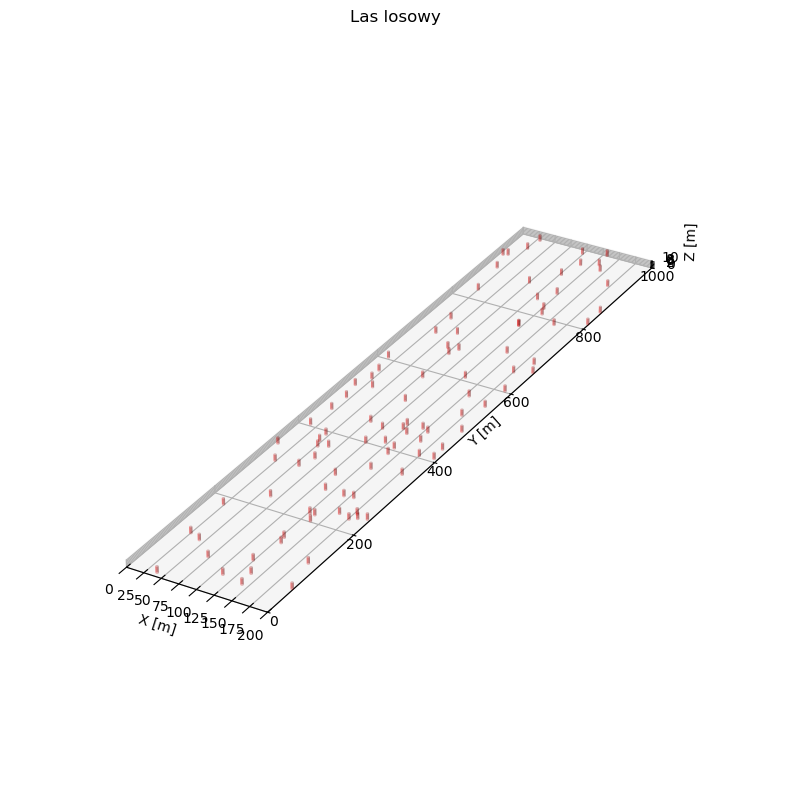

In [10]:
# 1. Definiujemy Świat
"""
  track_length: 600.0
  track_width: 60.0
  track_height: 11.0
  num_trees: 1
  tree_height: 10.0
  tree_radius: 1.0
"""
world_def = generate_world_boundaries(width=200.0, length=1000.0, height=11.0, ground_height=0.1)
# 2. Generujemy Losowy Las (Cylindry)
forest_random = generate_obstacles(
    world_def, 
    n_obstacles=100, 
    shape_type='CYLINDER', 
    placement_strategy=strategy_random_uniform,
    size_params={'radius': 2.0, 'height': 10.0}
)

# 4. Wizualizacja obu zestawów naraz
plot_world_scenario(world_def, [forest_random], title="Las losowy")


Rysowanie świata: 300.0x1000.0x11.0m
 -> Batch: BOX, Count: 60


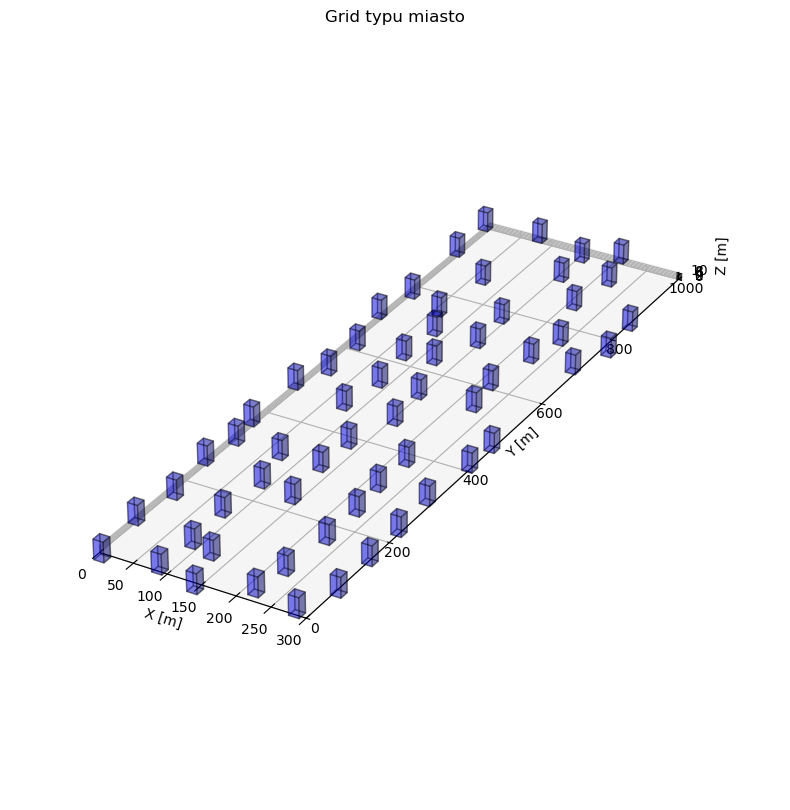

In [9]:
#### 1. Definiujemy Świat
"""
  city_length: 1000.0
  city_width: 300.0
  block_size: 30.0
  street_width: 10.0
  min_height: 15.0
  max_height: 60.0
  skyscraper_prob: 0.15
"""
world_def = generate_world_boundaries(width=300.0, length=1000.0, height=11.0, ground_height=0.1)

# 2. Generujemy Miasto (Pudełka w siatce)
city_grid = generate_obstacles(
    world_def,
    n_obstacles=60,
    shape_type='BOX',
    placement_strategy=strategy_grid_jitter,
    size_params={'length': 15.0, 'width': 15.0, 'height': 30.0}
)

# 4. Wizualizacja obu zestawów naraz
plot_world_scenario(world_def, [city_grid], title="Grid typu miasto")
